![圖](sqft_living.png)

### Step 1 ：輸入資料並視覺化資料長相
因為只有10筆資料，且我不是給csv檔案，所以我們必須手動輸入摟！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.array([55,27,33,70,13,26,89,21,10,67])
y_data = np.array([500000,275000,360000,780000,145000,280000,860000,200000,90000,670000])
plt.plot(x_data,y_data,'o')
plt.show()

<Figure size 640x480 with 1 Axes>

### Step 2 ：建立函式池子
將視覺化資料後，可以看出來所有的資料似乎是線性的關係，也不會有太多的彎曲，所以假設很簡單的函式池子：y = w * x + b。
* 1.先定義出填入資料的空間xs、ys，使用到tf.placeholder騰出空間，方便後來將資料填入，所以xs、ys是放入data_x和data_y的地方。
* 2.令兩變量weights、biases，利用tf.random_norma()使weights是一個1*1的矩陣的隨機初始值，而biases則是先設定初始值是0。
* 3.然後定義出 y = weights * xs + biases 的函式池子，且這邊的y將會是預測值。另外，因為weights和biases會一直變動，所以y也會一直變動，下一步會利用y的變動和真正的y(price)之間的差和用最小平方法調整loss並得到最好的weights、biases)。

In [2]:
import tensorflow as tf
#定義資料空間
xs = tf.placeholder(tf.float32)
ys = tf.placeholder(tf.float32)

#定義權重與偏差
weights = tf.Variable(tf.random_normal([1]),name = "w") 
biases = tf.Variable(tf.zeros([1]), name="B")
y =  weights*xs + biases    

### Step 3 ：定義損失函式和優化器
先介紹下：
* 1.tf.reduce_mean()：就是用來計算平均值。

語法：reduce_mean(input_tensor,axis=None,keep_dims=False,name=None)

分別是(1)輸入的tensor(2)指定的軸(3)是否下降維度(4)名稱
* 2.tf.square()：前面有提到哦，平方用的。

語法：tf.math.square(x,name=None)

分別是(1)輸入值(2)名稱
* 3.tf.train.GradientDescentOptimizer()：建立梯度下降的優化器。

語法不特別介紹，通常裡面只放學習率就好。
* 4.optimizer.minimize()：用來找到最小的loss。

語法不特別介紹，裡面放要下降的參數。

在做這個練習的時候，我也只有把原本教學的MAE改成MSE(Mean-Square Error)而已，原本的取絕對值改成取平方，其實道理是相同的，都是取正值！

In [3]:
## 損失
loss = tf.reduce_mean(tf.square(y - ys))
## 優化
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(loss)

### Step4 ： 開始訓練

0 [0.3260685] [0.]
1 [4742.1724] [83.19733]
2 [7250.9688] [127.40003]
3 [8578.311] [150.97159]
4 [9280.572] [163.62769]
5 [9652.119] [170.50865]
6 [9848.693] [174.33414]
7 [9952.692] [176.54301]
8 [10007.713] [177.89658]
9 [10036.819] [178.79759]
10 [10052.216] [179.45918]
11 [10060.358] [179.99408]
12 [10064.663] [180.46193]
13 [10066.9375] [180.8943]
14 [10068.138] [181.30789]
15 [10068.77] [181.71153]
16 [10069.101] [182.10991]
17 [10069.272] [182.50548]
18 [10069.36] [182.89955]
19 [10069.403] [183.29283]


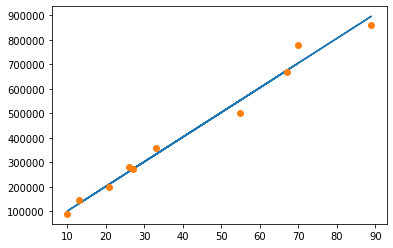

In [4]:
init = tf.global_variables_initializer()  ##初始化(前面有提到variable一定要做這個動作哦~)
with tf.Session() as sess: #tensorflow常用的起手式
    sess.run(init)  #tf的東西一定要run才會動
    for step in range(20): #疊代20次
        print(step, sess.run(weights, feed_dict={xs:x_data, ys:y_data}), sess.run(biases, feed_dict={xs:x_data, ys:y_data}))
        #先查看初始值
        sess.run(train, feed_dict={xs:x_data, ys:y_data}) #將data匯入，啟動優化器，開始更改weights和biases
        pred = sess.run(y, feed_dict={xs:x_data, ys:y_data}) #把預測值一併算出來
            
plt.plot(x_data, pred) #畫線
plt.plot(x_data, y_data, 'o' ) #畫點
plt.show()